In [6]:
from scipy.optimize import curve_fit
import random
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [2]:
df_j = pd.read_csv('C:\\Users\\obinna.izima\\Documents\\Documents from Desktop_14.06.2020\\traces_March 8\\h.264+mp3_TS.csv')

In [142]:
j = df_j['Jitter'].values

In [144]:
len(j)

4734

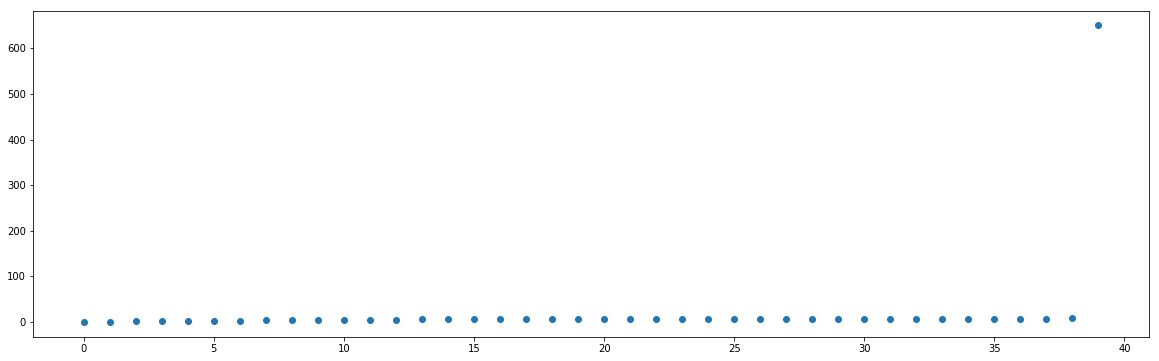

In [27]:
plt.plot(j[:40], 'o')

In [8]:
from statsmodels import api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.tools import diff

In [18]:
j_acf = sm.tsa.acf(j,nlags=500)

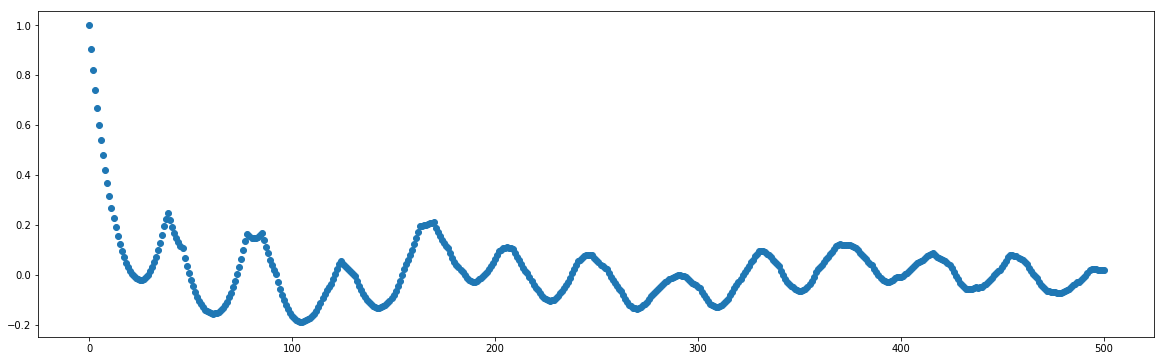

In [19]:
plt.plot(j_acf,'o')

In [20]:
peaks, _ = signal.find_peaks(j_acf, threshold=None)

In [21]:
peaks

array([ 39,  78,  85, 124, 168, 170, 206, 246, 290, 331, 370, 375, 398,
       416, 437, 454, 476, 495, 499], dtype=int64)

In [29]:
x = pd.read_csv('C:\\Users\\obinna.izima\\Documents\\Documents from Desktop_14.06.2020\\traces_March 8\\testcurves.csv')
xr = x['Jitter'][:1001].values

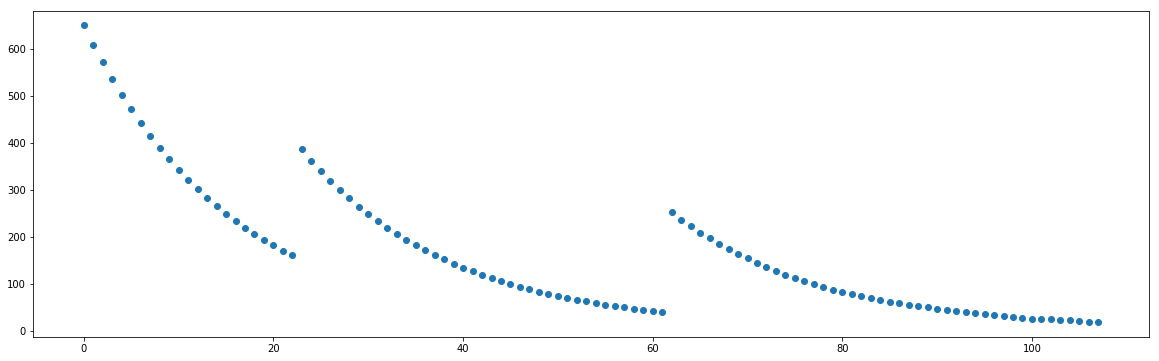

In [30]:
plt.plot(xr, 'o')

In [32]:
j_xr = sm.tsa.acf(xr,nlags=len(xr))

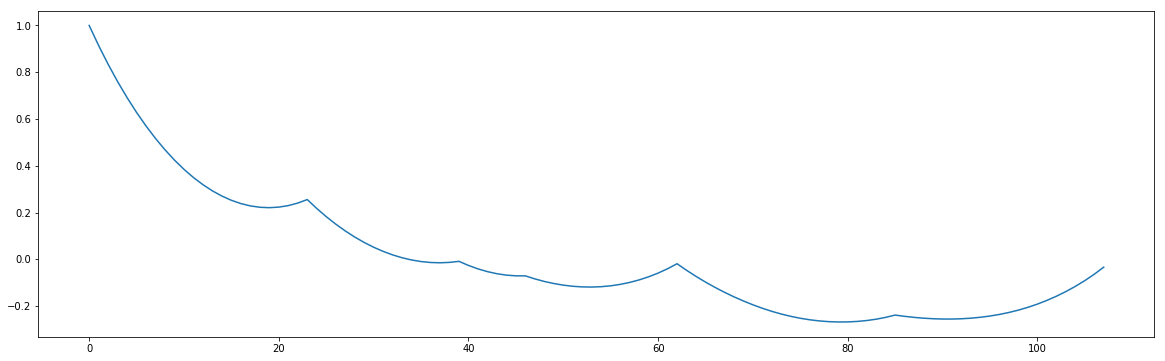

In [33]:
plt.plot(j_xr)

In [38]:
peaks_x, x_ = signal.find_peaks(j_xr,threshold=None)

In [39]:
peaks_x

array([23, 39, 62, 85], dtype=int64)

In [40]:
peaks_x_actual, x_actual_ = signal.find_peaks(xr,threshold=None)

In [41]:
peaks_x_actual

array([23, 62], dtype=int64)

In [56]:
def autocrr_peak(x):
    
    #n = np.arange(50,len(x),100)
    n = np.arange(20,100,20)
    
    acfs = []
    peaks_pos = []
    
    for i in n:
        acf = sm.tsa.acf(x[:i], nlags=i)
        plt.figure(figsize = (10, 8))
        lag = np.arange(len(x[:i]))
                        
        peaks_positive, _ = signal.find_peaks(acf, threshold=None)
        #peaks_positive, _ = signal.find_peaks(acf, height=0.0, threshold=None)
                   
        plt.plot(lag, acf,'b-')
        plt.plot(lag[peaks_positive], acf[peaks_positive], 'ro')
        print (peaks_positive, 'for : ', i)
        plt.xlabel('No. of Lags: ' + str(i))
        plt.ylabel('Autocorrelation')

[] for :  20
[17 23] for :  40
[23 37] for :  60
[18 23 62] for :  80


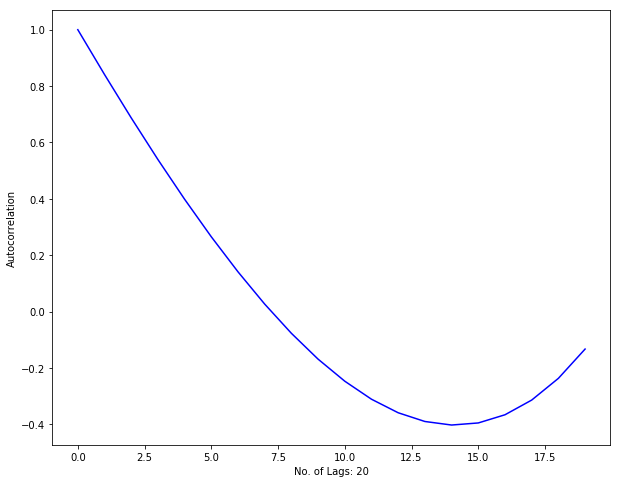

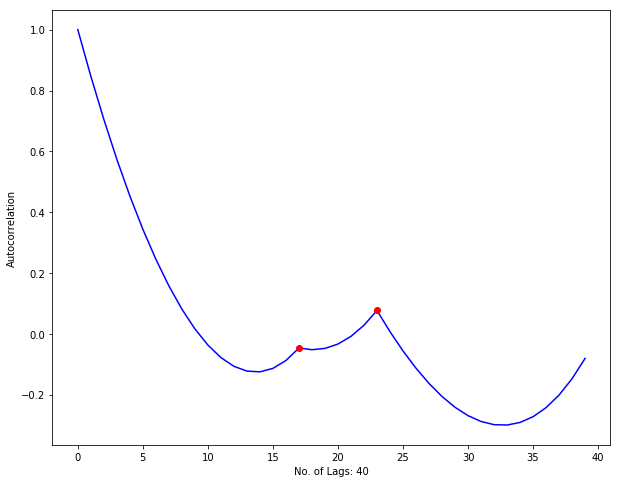

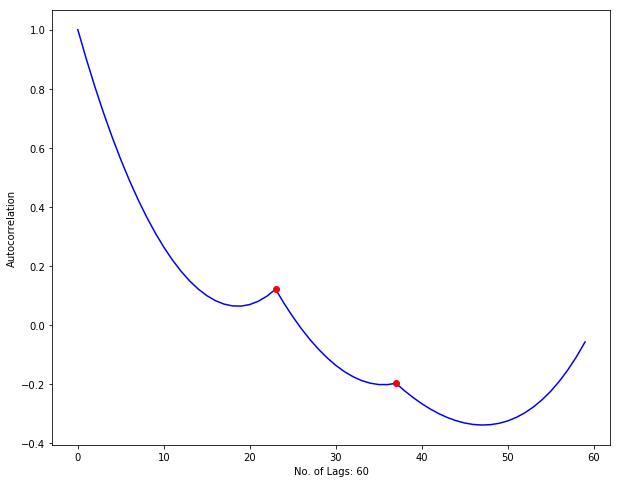

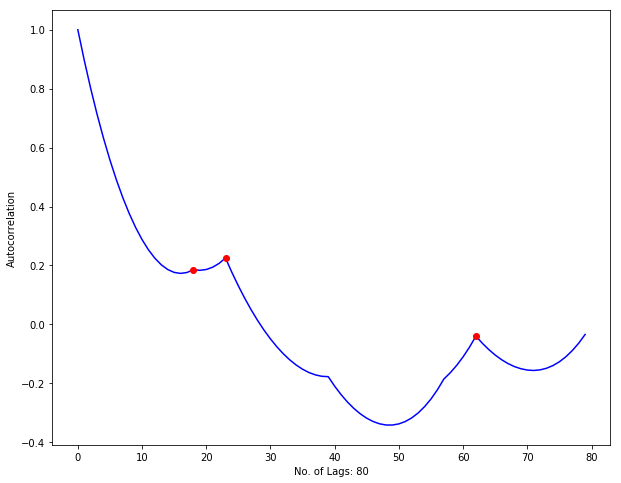

In [57]:
autocrr_peak(xr)

In [55]:
np.arange(20,108,20)

array([ 20,  40,  60,  80, 100])

In [46]:
np.arange(50, 108, 100)

array([50])

In [81]:
a = sm.tsa.acf(j,nlags=500)

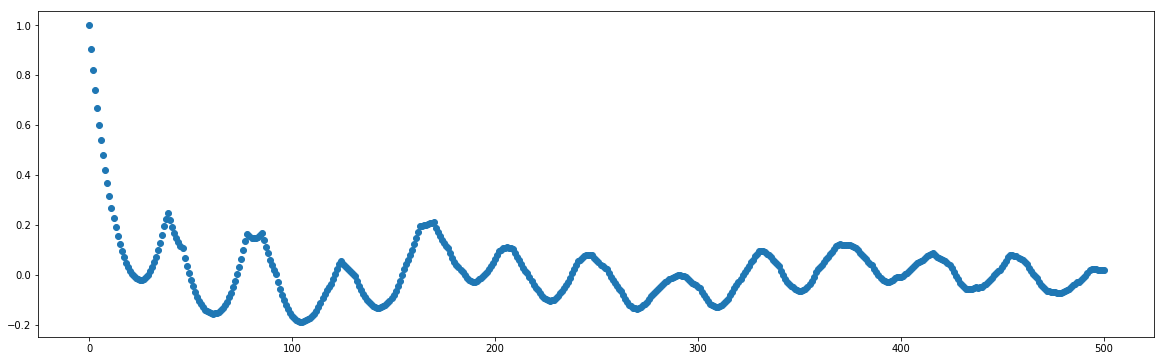

In [82]:
plt.plot(a,'o')

In [83]:
len(a)

501

In [99]:
c, c_ = signal.find_peaks(a,height=0.0,distance=10,threshold=None)

In [100]:
c

array([ 39,  85, 124, 170, 206, 246, 290, 331, 370, 416, 454, 495],
      dtype=int64)

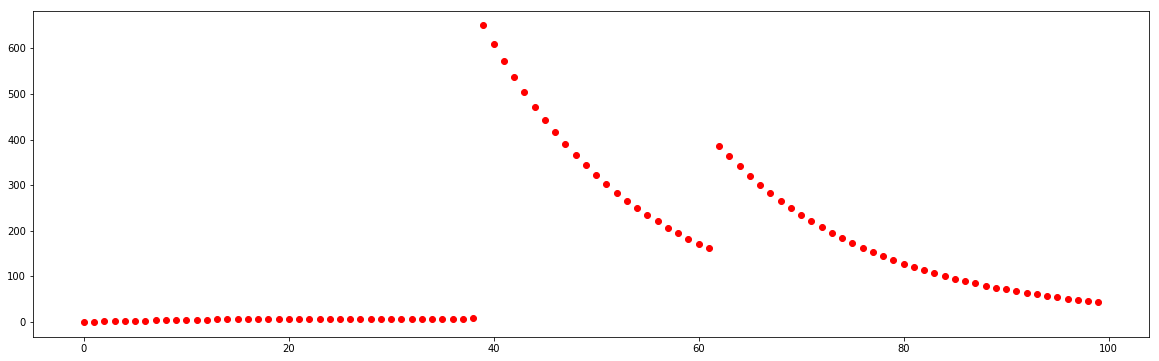

In [101]:
plt.plot(j[:100],'ro')

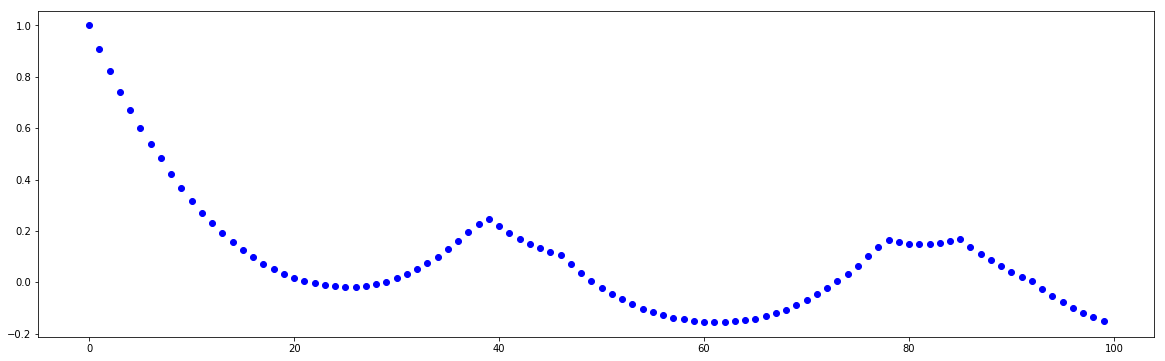

In [102]:
plt.plot(a[:100],'bo')

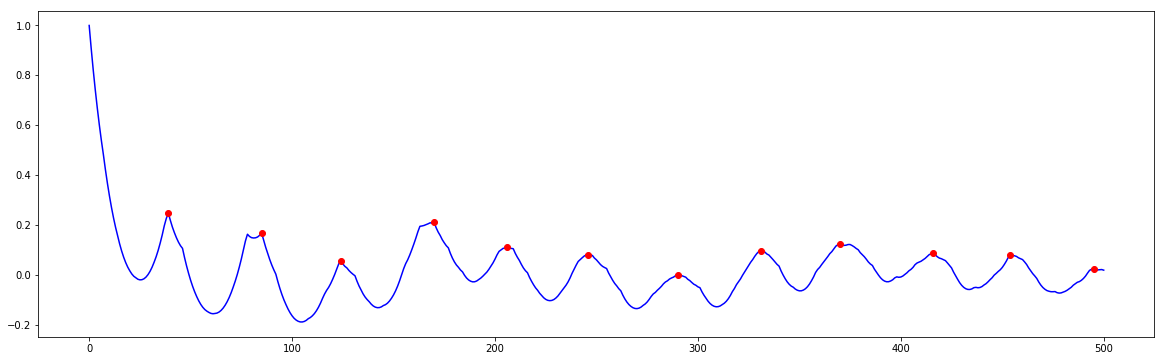

In [106]:
lag = np.arange(len(a))
plt.plot(lag, a,'b-')
plt.plot(lag[c], a[c], 'ro')

In [98]:
c

array([ 39,  78,  85, 124, 168, 170, 206, 246, 290, 331, 370, 375, 416,
       454, 495, 499], dtype=int64)

In [107]:
#from statsmodels.graphics.tsaplots import plot_acf

In [111]:
#plot_acf(j, lags=500)

In [141]:
plt.plot(j[:500], 'o')

IndexError: invalid index to scalar variable.

In [112]:
495-454

41

In [113]:
N = len(j[:500])
t = np.linspace(0,500,N)

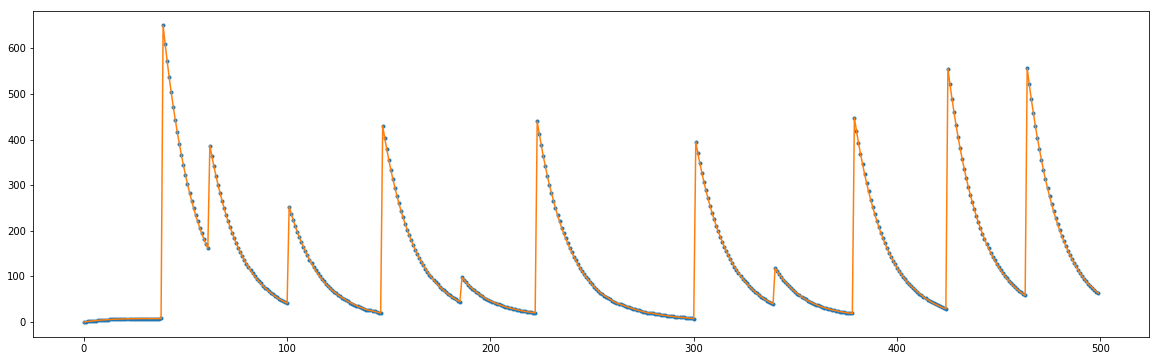

In [116]:
plt.plot(j[:500], '.')
plt.plot(j[:500], '-')

In [117]:
dxrdt = np.abs(np.diff(j[:500])/np.diff(t))

In [148]:
xcrit = 45

In [149]:
q = np.where(dxrdt > xcrit)
q

(array([ 38,  61, 100, 146, 185, 222, 300, 339, 378, 424, 463], dtype=int64),)

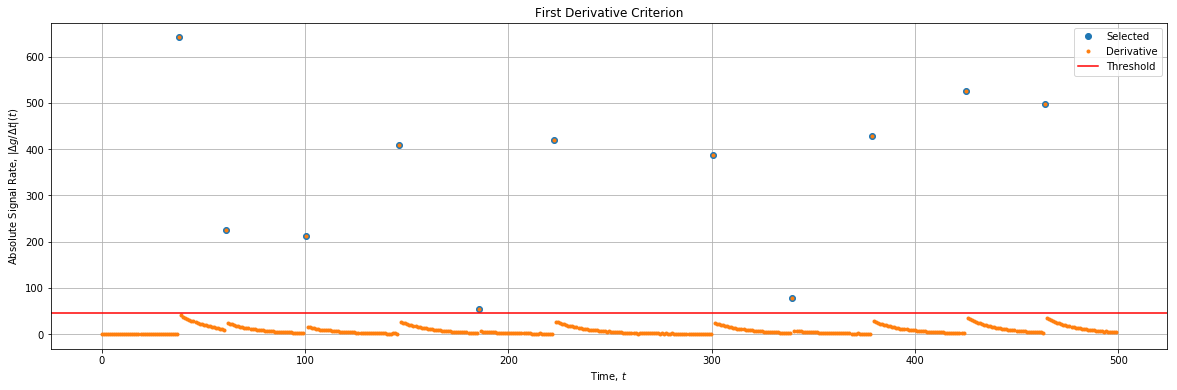

In [150]:
fig, axe = plt.subplots()
axe.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
axe.plot(t[:-1], dxrdt, '.', label='Derivative')
axe.axhline(xcrit, color="red", label='Threshold')
axe.set_title("First Derivative Criterion")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
axe.legend()
axe.grid()

In [151]:
idx = [0] + list(q[0]+1) + [t.size]
idx

[0, 39, 62, 101, 147, 186, 223, 301, 340, 379, 425, 464, 500]

In [135]:
def func(x,a,b):
    return a*np.exp(b*x)

In [146]:
dd = j[:500]

In [137]:
from scipy import signal, optimize

In [153]:
idx[1:]

[39, 62, 101, 147, 186, 223, 301, 340, 379, 425, 464, 500]

TypeError: Improper input: N=2 must not exceed M=1

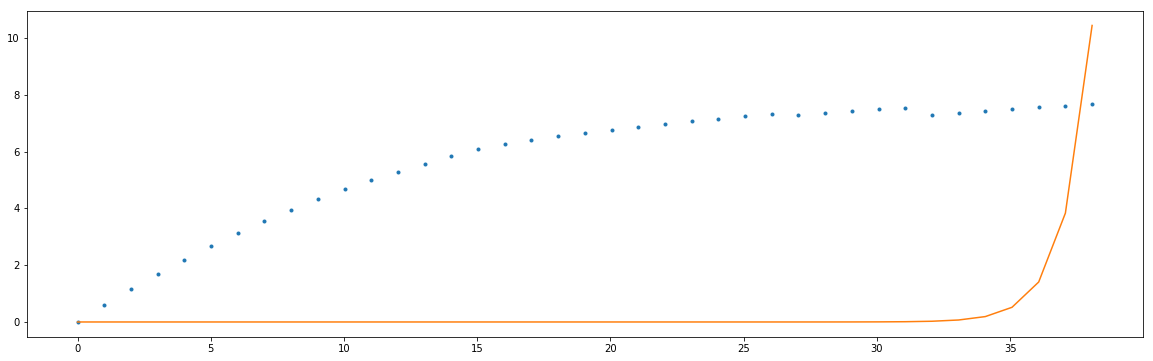

In [147]:
trials = []
fig, axe = plt.subplots()
for k, (i, j) in enumerate(zip(idx[:-1], idx[1:])):
    p, s = optimize.curve_fit(func, t[i:j]-t[i], dd[i:j])
    axe.plot(t[i:j], dd[i:j], '.', label="Data #{}".format(k+1))
    axe.plot(t[i:j], func(t[i:j]-t[i], *p), label="Data Fit #{}".format(k+1))
    trials.append({"n0": i, "n1": j, "t0": t[i], "a": p[0], "b": p[1],
                   "s_a": s[0,0], "s_b": s[1,1], "s_ab": s[0,1]})
#axe.set_title("Curve Fits")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal Estimate, $\hat{g}(t)$")
#axe.legend()
axe.grid()

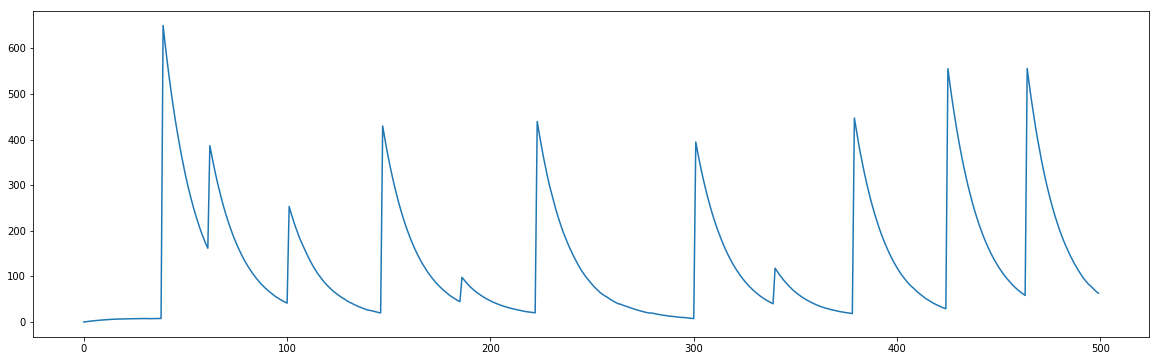

In [155]:
plt.plot(dd)

In [160]:
D = sm.tsa.acf(dd,nlags=500)

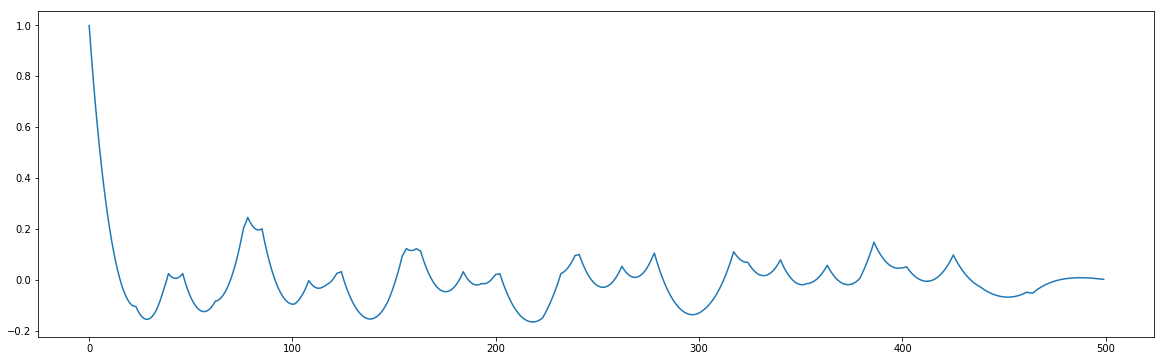

In [161]:
plt.plot(D)

In [166]:
DD, D_ = signal.find_peaks(D,threshold=None)

In [167]:
DD

array([ 39,  46,  78,  85, 108, 124, 156, 161, 184, 193, 202, 241, 262,
       278, 317, 340, 363, 386, 402, 425, 461, 488], dtype=int64)

In [170]:
dd[DD]

array([650.2120319 , 415.7232848 , 143.6598195 ,  94.92368177,
       165.3012821 ,  62.99036733, 244.22218   , 179.137615  ,
        46.89854006,  65.83814938,  42.13624887, 143.3751038 ,
        41.8753041 ,  19.56997168, 146.0733728 , 117.9285748 ,
        32.92664622, 286.1476341 , 104.7858443 , 555.5110141 ,
        64.64088892, 121.7857213 ])

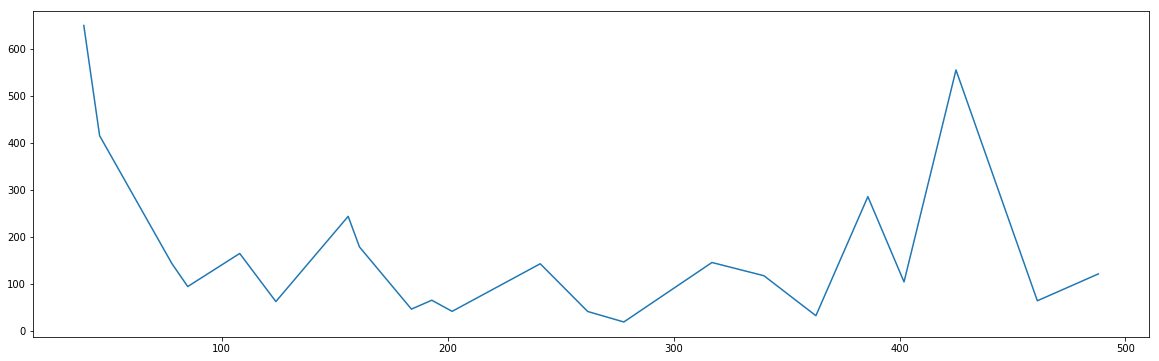

In [172]:
plt.plot(DD, dd[DD])

In [173]:
np.diff(DD)

array([ 7, 32,  7, 23, 16, 32,  5, 23,  9,  9, 39, 21, 16, 39, 23, 23, 23,
       16, 23, 36, 27], dtype=int64)

In [ ]:
np.fft